In [94]:
#import necessary packages
import numpy as np
import numpy.ma as ma
import pandas as pd
import matplotlib.pyplot as plt

import rasterio
from rasterio.plot import show

%matplotlib inline

import seaborn as sns  # type: ignore
sns.set(style="darkgrid")

In [95]:
aspect_tif = rasterio.open('aspect_reclass2.tif')

display(aspect_tif.profile)
display(aspect_tif.transform)
display(aspect_tif.indexes)

display(aspect_tif.nodatavals)
aspect_nodata = aspect_tif.nodata

{'driver': 'GTiff', 'dtype': 'int8', 'nodata': -128.0, 'width': 20786, 'height': 11552, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(1.0364611000000268e-05, 0.0, 106.271516179416,
       0.0, -1.0364611000000268e-05, 39.109701774573), 'blockxsize': 128, 'blockysize': 128, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}

Affine(1.0364611000000268e-05, 0.0, 106.271516179416,
       0.0, -1.0364611000000268e-05, 39.109701774573)

(1,)

(-128.0,)

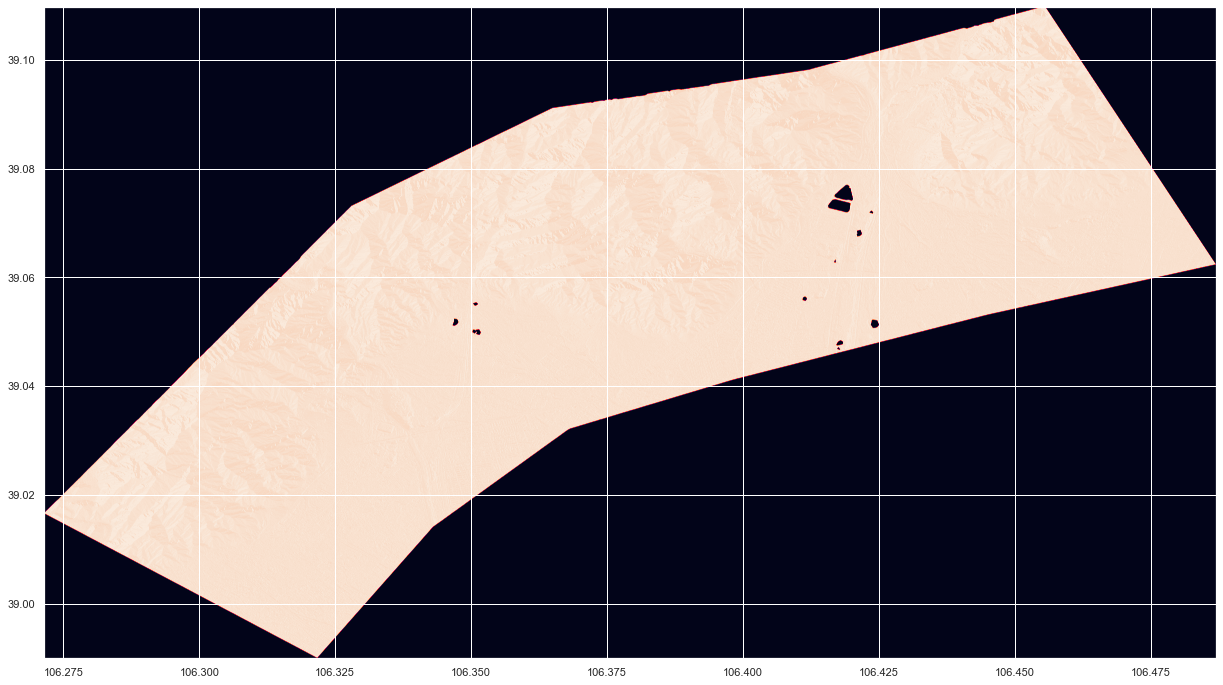

In [96]:
show((aspect_tif, 1))

In [97]:
aspect_band = aspect_tif.read(1, masked=True)
uniq_vals = np.unique(aspect_band)
display(uniq_vals)

display(aspect_band.shape)

masked_array(data=[-128,    1,    2,    3,    4,    5,    6,    7,    8],
             mask=False,
       fill_value=-128,
            dtype=int8)

(11552, 20786)

In [98]:
slope_tif = rasterio.open('PLEIADES_slope_8classes.tif')

In [99]:
display(slope_tif.profile)
display(slope_tif.transform)
display(slope_tif.indexes)
display(slope_tif.nodatavals)
display(slope_tif.nodata)

{'driver': 'GTiff', 'dtype': 'int8', 'nodata': -128.0, 'width': 20786, 'height': 11552, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(1.0364611406184864e-05, 0.0, 106.27151617941581,
       0.0, -1.0364611406184864e-05, 39.10970177457345), 'blockxsize': 128, 'blockysize': 128, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}

Affine(1.0364611406184864e-05, 0.0, 106.27151617941581,
       0.0, -1.0364611406184864e-05, 39.10970177457345)

(1,)

(-128.0,)

-128.0

In [100]:
slope_band = slope_tif.read(1, masked=True)
display(slope_band.shape)
slope_nodata = slope_tif.nodata

(11552, 20786)

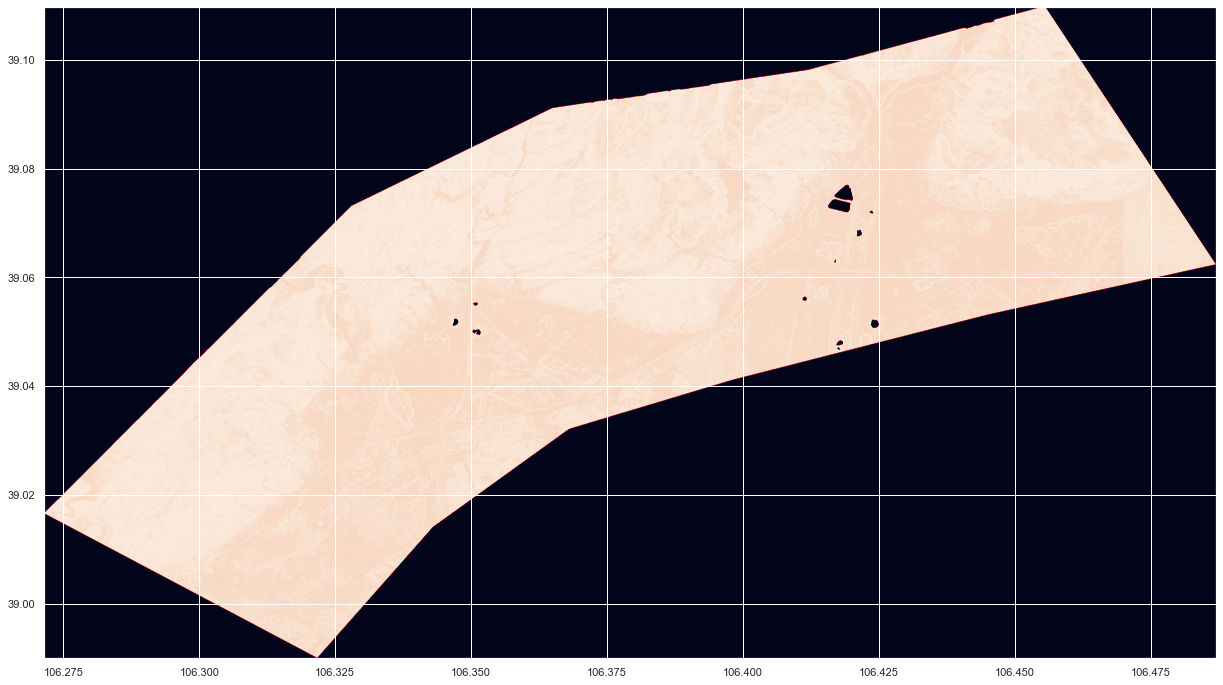

In [101]:
show((slope_tif, 1))

In [102]:
lc_tif = rasterio.open('maakate_reclass_resample_cl.tif')

In [103]:
display(lc_tif.profile)
display(lc_tif.transform)
display(lc_tif.indexes)
display(lc_tif.nodatavals)
display(lc_tif.nodata)

{'driver': 'GTiff', 'dtype': 'int8', 'nodata': None, 'width': 20786, 'height': 11552, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(1.0364611406184864e-05, 0.0, 106.27151617941581,
       0.0, -1.0364611406184847e-05, 39.10970177457355), 'blockxsize': 128, 'blockysize': 128, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}

Affine(1.0364611406184864e-05, 0.0, 106.27151617941581,
       0.0, -1.0364611406184847e-05, 39.10970177457355)

(1,)

(None,)

None

In [104]:
lc_band = lc_tif.read(1, masked=True)
display(lc_band.shape)
lc_nodata = lc_tif.nodata

uniq_vals = np.unique(lc_band)
display(uniq_vals)

(11552, 20786)

masked_array(data=[2, 3, 4, 5, 6, 7, 8, 10],
             mask=[False, False, False, False, False, False, False, False],
       fill_value=999999,
            dtype=int8)

In [105]:
error_tif_name = 'ASTER_error_cl_2.tif'
# error_tif_name = "SRTM_error_cl.tif"
# error_tif_name = "TDM1_error_cl.tif"
# error_tif_name = "MERIT_error_cl.tif"

error_tif = rasterio.open(error_tif_name)

In [106]:
display(error_tif.profile)
display(error_tif.transform)
display(error_tif.indexes)
display(error_tif.nodatavals)
display(error_tif.nodata)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028234663852886e+38, 'width': 20786, 'height': 11552, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(1.0364611406184864e-05, 0.0, 106.27151617941581,
       0.0, -1.0364611406184847e-05, 39.10970177457355), 'blockxsize': 128, 'blockysize': 128, 'tiled': True, 'interleave': 'band'}

Affine(1.0364611406184864e-05, 0.0, 106.27151617941581,
       0.0, -1.0364611406184847e-05, 39.10970177457355)

(1,)

(-3.4028234663852886e+38,)

-3.4028234663852886e+38

In [107]:
error_band = error_tif.read(1, masked=True)
display(error_band.shape)
error_nodata = error_tif.nodata

(11552, 20786)

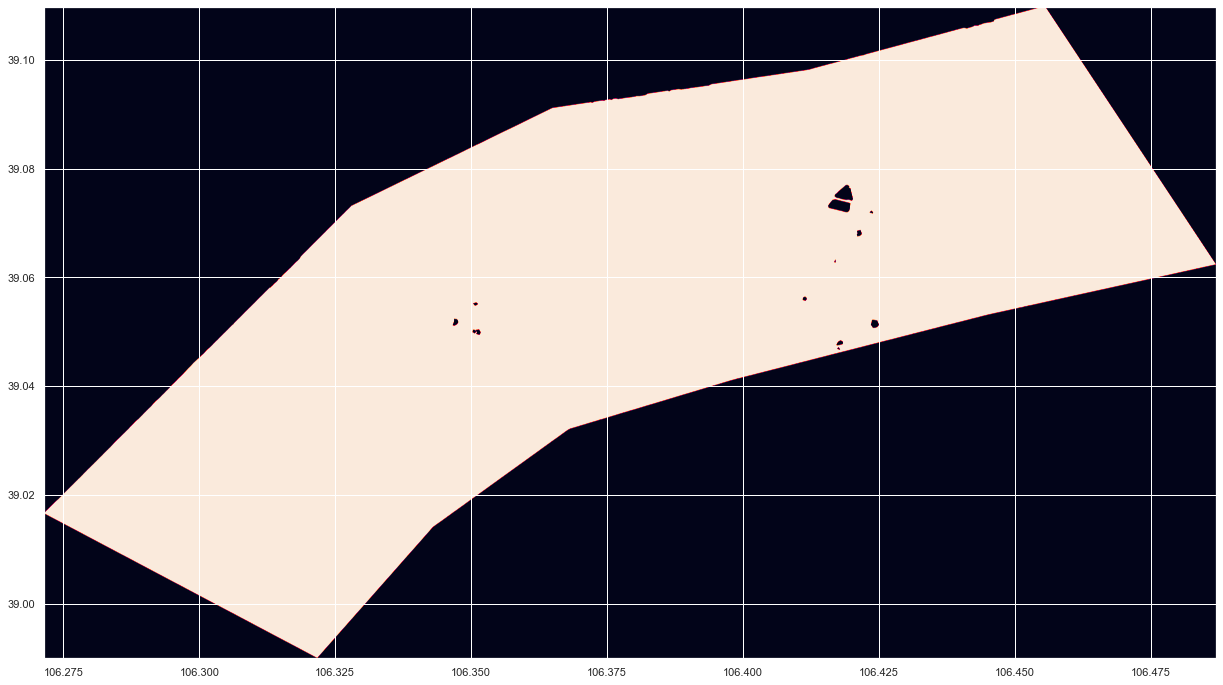

In [108]:
show((error_tif, 1))



In [109]:
# aspect is unsigned 8byte int, 0-255
aspect_band_x = ma.filled(aspect_band, aspect_nodata) 
# slope is int 8 byte -128 until +127
slope_band_x = ma.filled(slope_band, slope_nodata)

# slope is int 8 byte -128 until +127
lc_band_x = ma.filled(lc_band, slope_nodata)

In [110]:
# error is float32, 
error_band_x = ma.filled(error_band, np.nan)
error_colname = f"{error_tif_name.split('_')[0]}_error"
display(error_colname)

'ASTER_error'

In [111]:
new_df = pd.DataFrame({'slope': slope_band_x.flatten(),
                       'aspect': aspect_band_x.flatten(),
                       'lc': lc_band_x.flatten(),
                       error_colname: error_band_x.flatten()})

In [112]:
new_df.columns

Index(['slope', 'aspect', 'lc', 'ASTER_error'], dtype='object')

In [113]:
new_df.dtypes

slope             int8
aspect            int8
lc                int8
ASTER_error    float32
dtype: object

In [114]:
new_df.head(10)

,slope,aspect,lc,ASTER_error
0,-128,-128,7,NaN
1,-128,-128,7,NaN
2,-128,-128,7,NaN
3,-128,-128,7,NaN
4,-128,-128,7,NaN
5,-128,-128,7,NaN
6,-128,-128,7,NaN
7,-128,-128,7,NaN
8,-128,-128,7,NaN
9,-128,-128,7,NaN


In [115]:
new_df = new_df.loc[new_df['slope'] != slope_nodata]

In [116]:
new_df = new_df.loc[new_df['aspect'] != aspect_nodata]

In [117]:
new_df = new_df.loc[new_df[error_colname] != error_nodata]

In [118]:
new_df.head(10)

,slope,aspect,lc,ASTER_error
38531,8,5,7,-78.651978
38532,8,5,7,-77.352417
38533,8,5,7,-76.371948
38534,8,5,7,-74.871216
38535,8,5,7,-72.874756
38536,8,5,7,-71.815308
59312,8,4,7,-91.097534
59313,8,5,7,-88.319336
59314,8,5,7,-84.529419
59315,8,5,7,-70.163452


In [119]:
new_df.describe()

,slope,aspect,lc,ASTER_error
count,9.954724e+07,9.954724e+07,9.954724e+07,9.954724e+07
mean,4.554698e+00,4.525142e+00,5.871190e+00,6.653442e+00
std,2.528361e+00,2.151132e+00,1.251672e+00,1.522747e+01
min,1.000000e+00,1.000000e+00,3.000000e+00,-4.378899e+02
25%,2.000000e+00,3.000000e+00,5.000000e+00,-2.207764e+00
50%,5.000000e+00,5.000000e+00,7.000000e+00,4.321655e+00
75%,7.000000e+00,6.000000e+00,7.000000e+00,1.355664e+01
max,8.000000e+00,8.000000e+00,1.000000e+01,3.118903e+02


In [120]:
new_df.isna().sum()


slope          0
aspect         0
lc             0
ASTER_error    0
dtype: int64

In [121]:
#length of the dataframe to estimate the number of values plotted to the histogram
len(new_df)

99547238

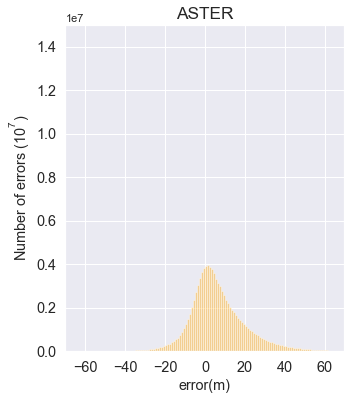

In [122]:
plt.figure(figsize=(5,6))
bin_range=list(range(-100,101))
hist_data=new_df['ASTER_error']
ax=sns.distplot(hist_data, bins=bin_range, kde=None, color='orange')
plt.xticks(
    rotation=0, 
    horizontalalignment='center',
    fontweight='light',
    fontsize='large', 
)

plt.xlabel('error(m)', fontsize='large')


plt.yticks(
    rotation=0, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large',
)
plt.ylabel('Number of errors ($\mathregular{10^7}$)', fontsize='large')
plt.xlim(-70, 70)
plt.ylim(0, 15000000)
plt.title("ASTER", fontsize='x-large')
plt.savefig('ASTER_china_hist_eng.png', dpi=300)

In [123]:
new_df.describe().round(2)

,slope,aspect,lc,ASTER_error
count,99547238.00,99547238.00,99547238.00,99547238.00
mean,4.55,4.53,5.87,6.65
std,2.53,2.15,1.25,15.23
min,1.00,1.00,3.00,-437.89
25%,2.00,3.00,5.00,-2.21
50%,5.00,5.00,7.00,4.32
75%,7.00,6.00,7.00,13.56
max,8.00,8.00,10.00,311.89


In [124]:
#calculate statistics for ASTER error

all_tt = new_df['ASTER_error'].describe(percentiles=[.25, .5, .683, .75, .95])
all_nt = pd.DataFrame(all_tt)
all_nt=all_nt.transpose()
all_nt['median']=new_df['ASTER_error'].median().round(2)
all_nt['NMAD']=new_df['ASTER_error'].mad().round(2)
all_nt['kurtosis']=new_df['ASTER_error'].kurtosis().round(2)
all_nt['skew']=new_df['ASTER_error'].skew().round(2)
all_nt['RMSE']=np.sqrt(np.mean((np.power(new_df['ASTER_error'], 2))))
all_nt.round(2)

,count,mean,std,min,25%,50%,68.3%,75%,95%,max,median,NMAD,kurtosis,skew,RMSE
ASTER_error,99547238.0,6.65,15.23,-437.89,-2.21,4.32,10.42,13.56,33.6,311.89,4.32,10.85,14.48,0.47,16.620001


In [125]:
#calculate statistics for each slope class  - iterates through slope classes and returns stats for each class into a dataframe
new_dfs = []
for i in sorted(new_df['slope'].unique().tolist()):
    tmp_df_slope = new_df.loc[new_df['slope'] == i]
    slope_tt = tmp_df_slope['ASTER_error'].describe(percentiles=[.25, .5, .683, .75, .95])
    slope_nt = pd.DataFrame(slope_tt)
    display(slope_nt.T)
    slope_nt= slope_nt.rename(columns={'ASTER_error': str(i)})
    slope_nt=slope_nt.transpose()
    t_add_stats=tmp_df_slope['ASTER_error']
    slope_nt['median']=t_add_stats.median().round(2)
    slope_nt['NMAD']=t_add_stats.mad().round(2)
    slope_nt['kurtosis']=t_add_stats.kurtosis().round(2)
    slope_nt['skew']=t_add_stats.skew().round(2)
    slope_nt['RMSE']=np.sqrt(np.mean((np.power(t_add_stats, 2))))
    new_dfs.append(slope_nt)

slope_asall_df = pd.concat(new_dfs, axis=0).round(2)
slope_asall_df.head(10)
#t_add_stats.median()

,count,mean,std,min,25%,50%,68.3%,75%,95%,max
ASTER_error,15282602.0,1.494592,9.558361,-237.719604,-3.611328,1.115662,4.64978,6.289185,16.917236,153.496582


,count,mean,std,min,25%,50%,68.3%,75%,95%,max
ASTER_error,14876941.0,2.579452,10.22121,-307.753784,-3.02124,1.759521,5.477417,7.273193,19.864014,158.342896


,count,mean,std,min,25%,50%,68.3%,75%,95%,max
ASTER_error,9995715.0,4.096435,11.73932,-308.046021,-2.645752,2.672363,7.137817,9.341797,24.81958,158.71106


,count,mean,std,min,25%,50%,68.3%,75%,95%,max
ASTER_error,9000532.0,5.943477,13.336048,-309.37854,-2.148438,4.088135,9.669312,12.399536,29.76062,158.456543


,count,mean,std,min,25%,50%,68.3%,75%,95%,max
ASTER_error,9603862.0,7.812897,14.599153,-314.036621,-1.431274,5.958252,12.391357,15.417816,33.71106,194.931152


,count,mean,std,min,25%,50%,68.3%,75%,95%,max
ASTER_error,10655690.0,9.40124,15.674091,-310.210449,-0.737061,7.707031,14.696289,17.844971,36.844971,194.812988


,count,mean,std,min,25%,50%,68.3%,75%,95%,max
ASTER_error,10626765.0,10.487456,16.658157,-323.338257,-0.368896,8.894775,16.31897,19.641357,39.337256,199.623535


,count,mean,std,min,25%,50%,68.3%,75%,95%,max
ASTER_error,19505131.0,11.279978,20.440582,-437.889893,-0.755371,9.445679,17.925171,21.778687,44.143799,311.890259


,count,mean,std,min,25%,50%,68.3%,75%,95%,max,median,NMAD,kurtosis,skew,RMSE
1,15282602.0,1.49,9.56,-237.72,-3.61,1.12,4.65,6.29,16.92,153.50,1.12,6.81,4.480000,0.35,9.670000
2,14876941.0,2.58,10.22,-307.75,-3.02,1.76,5.48,7.27,19.86,158.34,1.76,7.22,5.990000,0.81,10.540000
3,9995715.0,4.10,11.74,-308.05,-2.65,2.67,7.14,9.34,24.82,158.71,2.67,8.39,6.300000,1.07,12.430000
4,9000532.0,5.94,13.34,-309.38,-2.15,4.09,9.67,12.40,29.76,158.46,4.09,9.78,4.990000,1.04,14.600000
5,9603862.0,7.81,14.60,-314.04,-1.43,5.96,12.39,15.42,33.71,194.93,5.96,10.91,4.340000,0.91,16.559999
6,10655690.0,9.40,15.67,-310.21,-0.74,7.71,14.70,17.84,36.84,194.81,7.71,11.82,3.750000,0.87,18.280001
7,10626765.0,10.49,16.66,-323.34,-0.37,8.89,16.32,19.64,39.34,199.62,8.89,12.62,3.470000,0.80,19.680000
8,19505131.0,11.28,20.44,-437.89,-0.76,9.45,17.93,21.78,44.14,311.89,9.45,14.49,18.709999,-0.69,23.350000


In [126]:
#transpose the final dataframe
final_stats_slope=slope_asall_df.transpose().round(2)
final_stats_slope.head(15)

,1,2,3,4,5,6,7,8
count,15282602.00,14876941.00,9995715.00,9000532.00,9603862.00,10655690.00,10626765.00,19505131.00
mean,1.49,2.58,4.10,5.94,7.81,9.40,10.49,11.28
std,9.56,10.22,11.74,13.34,14.60,15.67,16.66,20.44
min,-237.72,-307.75,-308.05,-309.38,-314.04,-310.21,-323.34,-437.89
25%,-3.61,-3.02,-2.65,-2.15,-1.43,-0.74,-0.37,-0.76
50%,1.12,1.76,2.67,4.09,5.96,7.71,8.89,9.45
68.3%,4.65,5.48,7.14,9.67,12.39,14.70,16.32,17.93
75%,6.29,7.27,9.34,12.40,15.42,17.84,19.64,21.78
95%,16.92,19.86,24.82,29.76,33.71,36.84,39.34,44.14
max,153.50,158.34,158.71,158.46,194.93,194.81,199.62,311.89


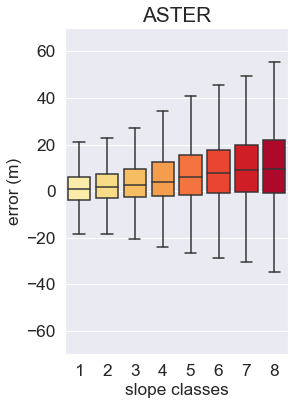

In [127]:
plt.figure(figsize=(4,6))

#define design of the outliers
outlier_design = dict(marker='o', markerfacecolor='black', markersize=1,
                  linestyle='none', markeredgecolor='black')
#plot the boxplots
chart = sns.boxplot(x='slope', y=error_colname, data=new_df, palette="YlOrRd", saturation=0.9, showfliers=False, flierprops = outlier_design)


plt.xticks(
    #[0, 1, 2, 3, 4, 5, 6, 7], ['N','NE','E','SE', 'S', 'SW', 'W', 'NW'],
    rotation=0, 
    horizontalalignment='center',
    fontweight='light',
    fontsize='x-large', 
)

plt.xlabel('slope classes', fontsize='x-large')


plt.yticks(
    rotation=0, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large',
)


plt.ylabel('error (m)', fontsize='x-large')

plt.title("ASTER", fontsize='xx-large')

#set min and max values for y-axis
plt.ylim(-70, 70)
plt.savefig('ASTER_china_slope_eng.png', dpi=300)

In [128]:
#calculate statistics for each land cover class  - iterates through land cover classes and returns stats for each class into a dataframe
new_dfs = []
for i in sorted(new_df['lc'].unique().tolist()):
    tmp_df_lc = new_df.loc[new_df['lc'] == i]
    lc_tt = tmp_df_lc['ASTER_error'].describe(percentiles=[.25, .5, .683, .75, .95])
    lc_nt = pd.DataFrame(lc_tt)
    display(lc_nt.T)
    lc_nt= lc_nt.rename(columns={'ASTER_error': str(i)})
    lc_nt=lc_nt.transpose()
    t_add_stats=tmp_df_lc['ASTER_error']
    lc_nt['median']=t_add_stats.median().round(2)
    lc_nt['NMAD']=t_add_stats.mad().round(2)
    lc_nt['kurtosis']=t_add_stats.kurtosis().round(2)
    lc_nt['skew']=t_add_stats.skew().round(2)
    lc_nt['RMSE']=np.sqrt(np.mean((np.power(t_add_stats, 2))))
    new_dfs.append(lc_nt)

lc_asall_df = pd.concat(new_dfs, axis=0).round(2)
lc_asall_df.head(10)


,count,mean,std,min,25%,50%,68.3%,75%,95%,max
ASTER_error,63359.0,-3.528772,7.623534,-24.861206,-10.131104,-1.906128,1.490307,2.89801,7.827368,13.758179


,count,mean,std,min,25%,50%,68.3%,75%,95%,max
ASTER_error,20328009.0,6.473906,15.325051,-302.595581,-3.089478,4.588867,11.401001,14.667236,33.700195,311.890259


,count,mean,std,min,25%,50%,68.3%,75%,95%,max
ASTER_error,23570720.0,1.26951,6.947602,-38.607178,-2.915527,1.027588,3.941284,5.230103,12.662598,48.074341


,count,mean,std,min,25%,50%,68.3%,75%,95%,max
ASTER_error,4131841.0,1.359752,8.326676,-65.702026,-3.359375,1.320923,4.666016,6.143799,13.924805,57.869141


,count,mean,std,min,25%,50%,68.3%,75%,95%,max
ASTER_error,51406354.0,9.625077,17.427103,-437.889893,-0.831421,7.915161,15.144409,18.454224,38.867188,201.522583


,count,mean,std,min,25%,50%,68.3%,75%,95%,max
ASTER_error,46955.0,13.246414,11.286594,-21.877075,5.148071,12.249512,20.600737,23.607849,31.487878,36.512329


,count,mean,std,min,25%,50%,68.3%,75%,95%,max,median,NMAD,kurtosis,skew,RMSE
3,63359.0,-3.53,7.62,-24.86,-10.13,-1.91,1.49,2.90,7.83,13.76,-1.91,6.58,-0.92,-0.25,8.400000
4,20328009.0,6.47,15.33,-302.60,-3.09,4.59,11.40,14.67,33.70,311.89,4.59,11.48,5.85,0.64,16.639999
5,23570720.0,1.27,6.95,-38.61,-2.92,1.03,3.94,5.23,12.66,48.07,1.03,5.23,1.87,0.24,7.060000
6,4131841.0,1.36,8.33,-65.70,-3.36,1.32,4.67,6.14,13.92,57.87,1.32,6.14,3.68,0.47,8.440000
7,51406354.0,9.63,17.43,-437.89,-0.83,7.92,15.14,18.45,38.87,201.52,7.92,12.59,14.33,0.02,19.910000
10,46955.0,13.25,11.29,-21.88,5.15,12.25,20.60,23.61,31.49,36.51,12.25,9.60,-0.96,-0.01,17.400000


In [129]:
#transpose the final dataframe
lc_final_stats=lc_asall_df.transpose().round(2)
lc_final_stats.head(15)

,3,4,5,6,7,10
count,63359.00,20328009.00,23570720.00,4131841.00,51406354.00,46955.00
mean,-3.53,6.47,1.27,1.36,9.63,13.25
std,7.62,15.33,6.95,8.33,17.43,11.29
min,-24.86,-302.60,-38.61,-65.70,-437.89,-21.88
25%,-10.13,-3.09,-2.92,-3.36,-0.83,5.15
50%,-1.91,4.59,1.03,1.32,7.92,12.25
68.3%,1.49,11.40,3.94,4.67,15.14,20.60
75%,2.90,14.67,5.23,6.14,18.45,23.61
95%,7.83,33.70,12.66,13.92,38.87,31.49
max,13.76,311.89,48.07,57.87,201.52,36.51


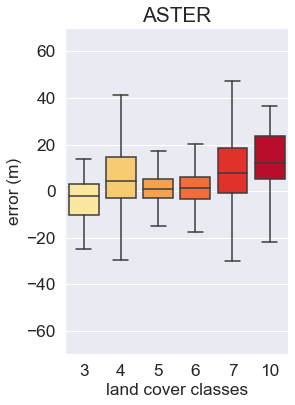

In [130]:
plt.figure(figsize=(4,6))

#define design of the outliers
outlier_design = dict(marker='o', markerfacecolor='black', markersize=1,
                  linestyle='none', markeredgecolor='black')
#plot the boxplots
chart = sns.boxplot(x='lc', y=error_colname, data=new_df, palette="YlOrRd", saturation=0.9, showfliers=False, flierprops = outlier_design)


plt.xticks(
    #[0, 1, 2, 3, 4, 5, 6, 7], ['N','NE','E','SE', 'S', 'SW', 'W', 'NW'],
    rotation=0, 
    horizontalalignment='center',
    fontweight='light',
    fontsize='x-large', 
)

plt.xlabel('land cover classes', fontsize='x-large')


plt.yticks(
    rotation=0, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large',
)


plt.ylabel('error (m)', fontsize='x-large')

plt.title("ASTER", fontsize='xx-large')

#set min and max values for y-axis
plt.ylim(-70, 70)
plt.savefig('ASTER_china_lc_eng.png', dpi=300)

In [131]:
slope_lg3_data = new_df
slope_lg3_data = new_df.loc[new_df['slope'] > 3 ]
new_df_slope = slope_lg3_data

In [132]:
#calculate statistics for each aspect class  - iterates through aspect classes and returns stats for each class into a dataframe
new_dfs = []
for i in sorted(new_df_slope['aspect'].unique().tolist()):
    tmp_df_aspect = new_df_slope.loc[new_df_slope['aspect'] == i]
    aspect_tt = tmp_df_aspect['ASTER_error'].describe(percentiles=[.25, .5, .683, .75, .95])
    aspect_nt = pd.DataFrame(aspect_tt)
    display(aspect_nt.T)
    aspect_nt= aspect_nt.rename(columns={'ASTER_error': str(i)})
    aspect_nt=aspect_nt.transpose()
    t_add_stats=tmp_df_aspect['ASTER_error']
    aspect_nt['median']=t_add_stats.median().round(2)
    aspect_nt['NMAD']=t_add_stats.mad().round(2)
    aspect_nt['kurtosis']=t_add_stats.kurtosis().round(2)
    aspect_nt['skew']=t_add_stats.skew().round(2)
    aspect_nt['RMSE']=np.sqrt(np.mean((np.power(t_add_stats, 2))))
    new_dfs.append(aspect_nt)

aspect_asall_df = pd.concat(new_dfs, axis=0).round(2)
aspect_asall_df.head(10)


,count,mean,std,min,25%,50%,68.3%,75%,95%,max
ASTER_error,6838053.0,7.175665,16.568066,-437.889893,-2.364746,4.813232,11.336182,14.577393,35.617798,311.062622


,count,mean,std,min,25%,50%,68.3%,75%,95%,max
ASTER_error,5545287.0,7.593851,18.412577,-391.012451,-3.210693,4.724976,12.134644,15.8927,40.045898,310.636841


,count,mean,std,min,25%,50%,68.3%,75%,95%,max
ASTER_error,5954547.0,8.786021,18.599127,-339.943359,-2.580627,6.513794,14.549561,18.368164,40.35625,311.890259


,count,mean,std,min,25%,50%,68.3%,75%,95%,max
ASTER_error,9830600.0,10.253498,17.936489,-358.733154,-0.623047,8.473877,16.190186,19.697632,39.953741,311.420288


,count,mean,std,min,25%,50%,68.3%,75%,95%,max
ASTER_error,11582441.0,10.679002,17.466576,-401.14563,-0.106201,8.629761,16.083618,19.468506,40.338867,302.602417


,count,mean,std,min,25%,50%,68.3%,75%,95%,max
ASTER_error,7033402.0,9.546109,16.384949,-375.19104,-0.771729,7.718384,14.815552,18.055176,37.636469,303.33667


,count,mean,std,min,25%,50%,68.3%,75%,95%,max
ASTER_error,5795211.0,10.338678,16.141047,-350.080566,-0.012207,8.910889,16.097046,19.286865,38.271851,310.438721


,count,mean,std,min,25%,50%,68.3%,75%,95%,max
ASTER_error,6812439.0,9.560811,15.230579,-401.629395,-0.007202,7.999756,14.685181,17.747803,36.210083,306.398071


,count,mean,std,min,25%,50%,68.3%,75%,95%,max,median,NMAD,kurtosis,skew,RMSE
1,6838053.0,7.18,16.57,-437.89,-2.36,4.81,11.34,14.58,35.62,311.06,4.81,11.68,15.24,0.72,18.059999
2,5545287.0,7.59,18.41,-391.01,-3.21,4.72,12.13,15.89,40.05,310.64,4.72,13.12,12.39,0.63,19.920000
3,5954547.0,8.79,18.60,-339.94,-2.58,6.51,14.55,18.37,40.36,311.89,6.51,13.55,12.67,0.11,20.570000
4,9830600.0,10.25,17.94,-358.73,-0.62,8.47,16.19,19.70,39.95,311.42,8.47,13.01,16.75,-0.41,20.660000
5,11582441.0,10.68,17.47,-401.15,-0.11,8.63,16.08,19.47,40.34,302.60,8.63,12.65,14.41,0.07,20.469999
6,7033402.0,9.55,16.38,-375.19,-0.77,7.72,14.82,18.06,37.64,303.34,7.72,12.03,13.08,0.22,18.959999
7,5795211.0,10.34,16.14,-350.08,-0.01,8.91,16.10,19.29,38.27,310.44,8.91,12.14,10.49,0.04,19.170000
8,6812439.0,9.56,15.23,-401.63,-0.01,8.00,14.69,17.75,36.21,306.40,8.00,11.35,12.73,0.06,17.980000


In [133]:
#transpose the final dataframe
aspect_final_stats=aspect_asall_df.transpose().round(2)
aspect_final_stats.head(15)

,1,2,3,4,5,6,7,8
count,6838053.00,5545287.00,5954547.00,9830600.00,11582441.00,7033402.00,5795211.00,6812439.00
mean,7.18,7.59,8.79,10.25,10.68,9.55,10.34,9.56
std,16.57,18.41,18.60,17.94,17.47,16.38,16.14,15.23
min,-437.89,-391.01,-339.94,-358.73,-401.15,-375.19,-350.08,-401.63
25%,-2.36,-3.21,-2.58,-0.62,-0.11,-0.77,-0.01,-0.01
50%,4.81,4.72,6.51,8.47,8.63,7.72,8.91,8.00
68.3%,11.34,12.13,14.55,16.19,16.08,14.82,16.10,14.69
75%,14.58,15.89,18.37,19.70,19.47,18.06,19.29,17.75
95%,35.62,40.05,40.36,39.95,40.34,37.64,38.27,36.21
max,311.06,310.64,311.89,311.42,302.60,303.34,310.44,306.40


In [134]:
#esport stats to scv file
aspect_final_stats.to_csv("merit_china_stats.csv")

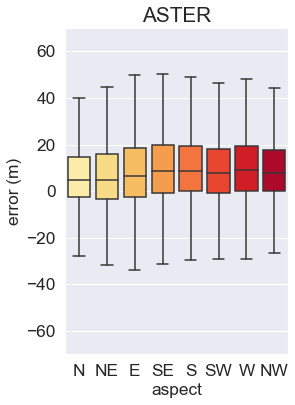

In [135]:
plt.figure(figsize=(4,6))

#define design of the outliers
outlier_design = dict(marker='o', markerfacecolor='black', markersize=1,
                  linestyle='none', markeredgecolor='black')
#plot the boxplots
chart = sns.boxplot(x='aspect', y=error_colname, data=slope_lg3_data, palette="YlOrRd", saturation=0.9, showfliers=False, flierprops = outlier_design)

#labels--> [1, 2, 3, 4, 5, 6, 7, 8], ['N','NE','E','SE', 'S', 'SW', 'W', 'NW'],

plt.xticks(
    [0, 1, 2, 3, 4, 5, 6, 7], ['N','NE','E','SE', 'S', 'SW', 'W', 'NW'],
    rotation=0, 
    horizontalalignment='center',
    fontweight='light',
    fontsize='x-large', 
)

plt.xlabel('aspect', fontsize='x-large')


plt.yticks(
    rotation=0, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large',
)


plt.ylabel('error (m)', fontsize='x-large')

plt.title("ASTER", fontsize='xx-large')

#set min and max values for y-axis
plt.ylim(-70, 70)
plt.savefig('ASTER_china_aspect_eng.png', dpi=300)

In [136]:
#filename = f"{error_tif_name.split('_')[0]}_error_china_aspect_slope_lc_eng.txt"

#new_df.to_csv(filename)

In [137]:
# new_df.to_csv(filename + '.gz', compression='gzip')